# This is a python project that implement the function imfilter in the first part and a new function called my_compose



### Part 1: Implementing the imfilter function.

write r=my_imfilter(s,filter,pad) a function that "filters" the source image
(a square matrix of some size) according to a filter of some size. 
with the help of the function you wrote, you will perform smoothing and sharpening of the given image.

• Implement 3 types of padding

• Work on photos you took, transfer them to gray levels, size (256X256)

• Compare the result with using the library functions. What is the biggest difference? from where
  Where does the difference come from? Is it visually noticeable?

• Compare the performance(run time) against the library functions.

• Do not use library functions in the implementation.




In [1]:
# installing opencv
#!pip install opencv



In [2]:
# Imports
import numpy as np
import cv2 as cv
import time
import matplotlib.pyplot as plt


Defining 3 padding

In [3]:
# Defining the 3 padding options to be used in the my_imfilter function
def zero_padding(image, pad_size):
    height, width = image.shape
    padded_image = np.zeros((height + 2 * pad_size, width + 2 * pad_size)) # Initialize the padded image and the padding with 0
    padded_image[pad_size:pad_size + height, pad_size:pad_size + width] = image # Applying the image to the padded image
    return padded_image

def replicate_padding(image, pad_size):
    height, width = image.shape
    padded_image = np.zeros((height + 2 * pad_size, width + 2 * pad_size))
    
    # padding the top, bottom, left, and right borders
    padded_image[:pad_size, pad_size:-pad_size] = image[0, :] # Top
    padded_image[-pad_size:, pad_size:-pad_size] = image[-1, :] # Bottom
    padded_image[pad_size:-pad_size, :pad_size] = image[:, 0].reshape(-1, 1) # Left
    padded_image[pad_size:-pad_size, -pad_size:] = image[:, -1].reshape(-1, 1) # Right
    
    # padding the corner areas
    padded_image[:pad_size, :pad_size] = image[0, 0] # Top-left corner
    padded_image[:pad_size, -pad_size:] = image[0, -1] # Top-right corner
    padded_image[-pad_size:, :pad_size] = image[-1, 0] # Bottom-left corner
    padded_image[-pad_size:, -pad_size:] = image[-1, -1] # Bottom-right corner
    
    # adding to the central area of the proccessed image the original image
    padded_image[pad_size:pad_size + height, pad_size:pad_size + width] = image
    
    return padded_image

def reflect_padding(image, pad_size):
    height, width = image.shape
    padded_image = np.zeros((height + 2 * pad_size, width + 2 * pad_size))
    
    # padding the top, bottom, left, and right borders of the image
    padded_image[:pad_size, pad_size:-pad_size] = np.flipud(image[:pad_size, :]) # Top
    padded_image[-pad_size:, pad_size:-pad_size] = np.flipud(image[-pad_size:, :]) # Bottom
    padded_image[pad_size:-pad_size, :pad_size] = np.fliplr(image[:, :pad_size]) # Left
    padded_image[pad_size:-pad_size, -pad_size:] = np.fliplr(image[:, -pad_size:]) # Right
    
    # padding the corner areas with the reflected values
    padded_image[:pad_size, :pad_size] = np.flipud(np.fliplr(image[:pad_size, :pad_size])) # Top-left corner
    padded_image[:pad_size, -pad_size:] = np.flipud(np.fliplr(image[:pad_size, -pad_size:])) # Top-right corner
    padded_image[-pad_size:, :pad_size] = np.flipud(np.fliplr(image[-pad_size:, :pad_size])) # Bottom-left corner
    padded_image[-pad_size:, -pad_size:] = np.flipud(np.fliplr(image[-pad_size:, -pad_size:])) # Bottom-right corner
    
    # adding to the central area of the proccesssed image the original image
    padded_image[pad_size:pad_size + height, pad_size:pad_size + width] = image
    
    return padded_image

The main function my_imfilter

In [99]:

# Defining the imfilter function with 3 diffrent types of paddings
def my_imfilter(s, filter, pad):
    # Defining a dictionary to map all padding options to padding operations
    padding_operations = {
        'zero': lambda img, pad_size: zero_padding(img, pad_size),
        'replicate': lambda img, pad_size: replicate_padding(img, pad_size),
        'reflect': lambda img, pad_size: reflect_padding(img, pad_size)
    }

    # Checking if the padding option choosen is valid
    if pad not in padding_operations:
        raise ValueError("invalid padding option")

    # Grabing the padding operation for the wanted padding option
    padding_function = padding_operations[pad]

    # Determining the padding size by the filter size (should be odd number)
    filter_size = filter.shape[0]
    pad_size = (filter_size - 1) // 2

    # Appling padding using the choosen padding 
    padded_image = padding_function(s, pad_size)
    
    output = np.zeros_like(s) # The processed image will be saved here, so we initialize it to be all zero
   

    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            window = padded_image[i:i+filter_size, j:j+filter_size] # this is the area we apply the filter on the original img
            output[i, j] = np.sum(window * filter)
            
                    
    return output

In [100]:


# Loading my image and converting it to grayscale and then resizing it to (256, 256)
image = cv.imread('my_dog.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_image = cv.resize(gray_image, (256, 256))

# Defining my smoothing and sharpening filters
smoothing_filter = np.ones((3, 3)) / 9
sharpening_filter = np.array([[0, -1, 0,],
                              [-1, 5, -1],
                              [0, -1, 0]])


# Smoothing
smoothed_image_zero = my_imfilter(gray_image, smoothing_filter, pad='zero')
smoothed_image_replicate = my_imfilter(gray_image, smoothing_filter, pad='replicate')
smoothed_image_reflect = my_imfilter(gray_image, smoothing_filter, pad='reflect')

# Sharpening
sharpened_image_zero = my_imfilter(gray_image, sharpening_filter, pad='zero')
sharpened_image_replicate = my_imfilter(gray_image, sharpening_filter, pad='replicate')
sharpened_image_reflect = my_imfilter(gray_image, sharpening_filter, pad='reflect')



### Comparing the performance against the library functions (OpenCV) by comparing the time it took to work.

#### Comparing smoothing:

In [47]:

# Timing for my_imfilter
start_time = time.time()
result_smoothing = my_imfilter(gray_image, smoothing_filter, pad='zero')
end_time = time.time()
print("My filter execution time with smoothing:", end_time - start_time)

# Timing for OpenCV GaussianBlur
start_time = time.time()
result_gaussian = cv.GaussianBlur(gray_image, (3, 3), 0)
end_time = time.time()
print("OpenCV GaussianBlur execution time:", end_time - start_time)

# Calculation the max diffrences of the pixels between the images
abs_diff = np.abs(result_smoothing - result_gaussian)
max_diff = np.max(abs_diff)
print(f"Maximum Absolute Pixel Difference: {max_diff}")


My filter execution time with smoothing: 0.40058374404907227
OpenCV GaussianBlur execution time: 0.0009796619415283203
Maximum Absolute Pixel Difference: 255



#### Comparing sharpening: 


In [49]:

# Timing for my_imfilter
start_time = time.time()
result_sharpening = my_imfilter(gray_image, sharpening_filter, pad='zero')
end_time = time.time()
print("My filter execution time with sharpening:", end_time - start_time)

# Defining my custom kernel
custom_kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])
# Timing for OpenCV filter2D
start_time = time.time()
# Applying the kernel to the image with cv2.filter2D
sharpened_image = cv.filter2D(gray_image, -1, custom_kernel)
end_time = time.time()
print("Sharpening with library fucntion execution time:", end_time - start_time)

# Calculation the max diffrences of the pixels between the images
abs_diff = np.abs(result_sharpening - sharpened_image)
max_diff = np.max(abs_diff)
print(f"Maximum Absolute Pixel Difference: {max_diff}")



My filter execution time with sharpening: 0.3997044563293457
Sharpening with library fucntion execution time: 0.0
Maximum Absolute Pixel Difference: 255


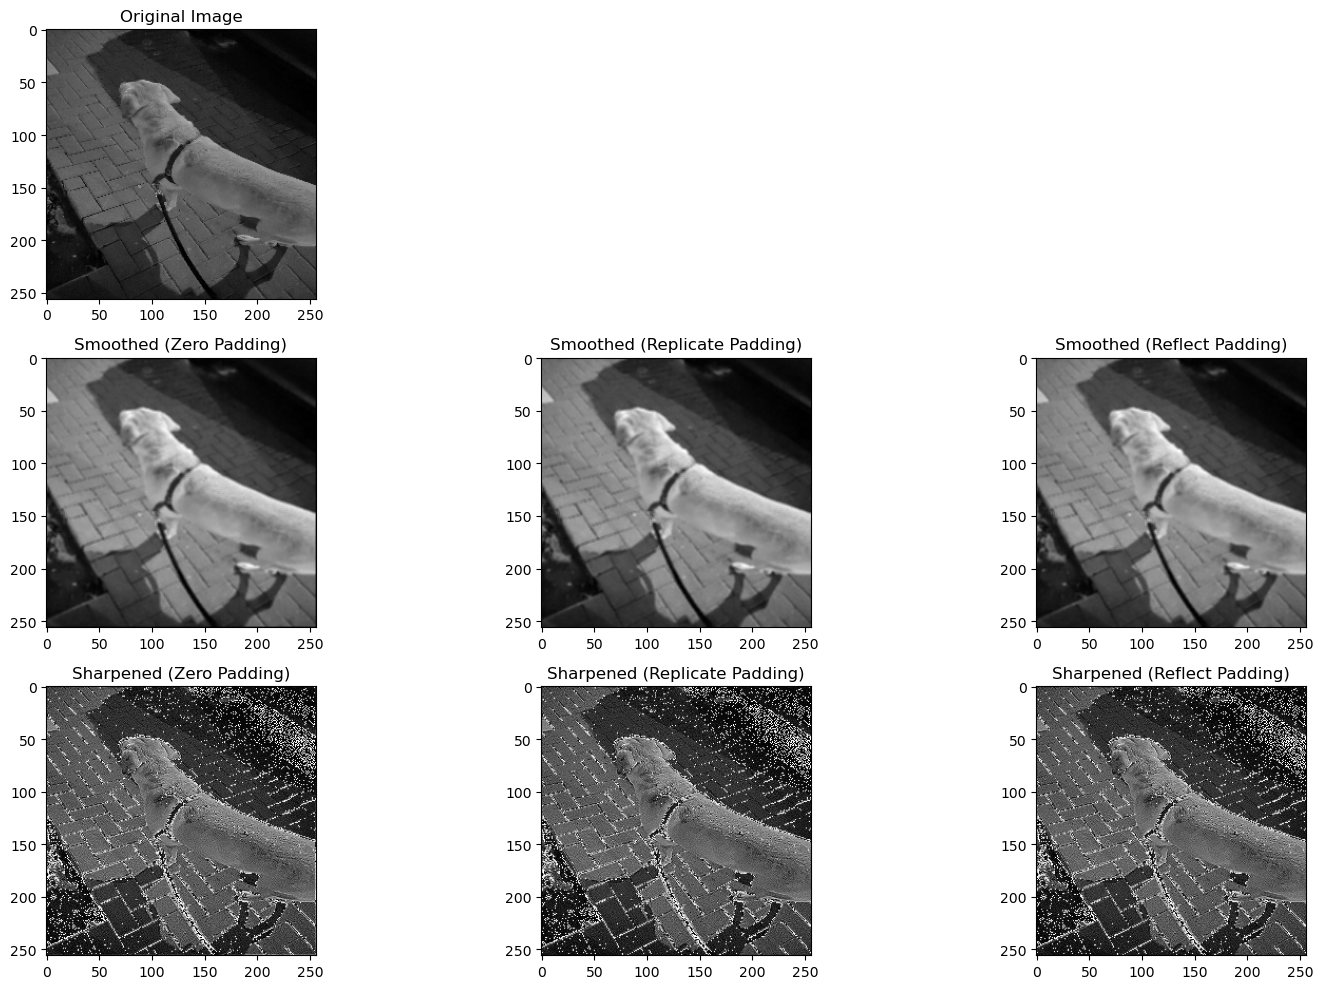

In [96]:
# Displaying the original image and the processed results with all the diffrent paddings
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 3, 4)
plt.imshow(smoothed_image_zero, cmap='gray')
plt.title('Smoothed (Zero Padding)')

plt.subplot(3, 3, 7)
plt.imshow(sharpened_image_zero, cmap='gray')
plt.title('Sharpened (Zero Padding)')

plt.subplot(3, 3, 5)
plt.imshow(smoothed_image_replicate, cmap='gray')
plt.title('Smoothed (Replicate Padding)')

plt.subplot(3, 3, 8)
plt.imshow(sharpened_image_replicate, cmap='gray')
plt.title('Sharpened (Replicate Padding)')

plt.subplot(3, 3, 6)
plt.imshow(smoothed_image_reflect, cmap='gray')
plt.title('Smoothed (Reflect Padding)')

plt.subplot(3, 3, 9)
plt.imshow(sharpened_image_reflect, cmap='gray')
plt.title('Sharpened (Reflect Padding)')

plt.tight_layout()
plt.show()

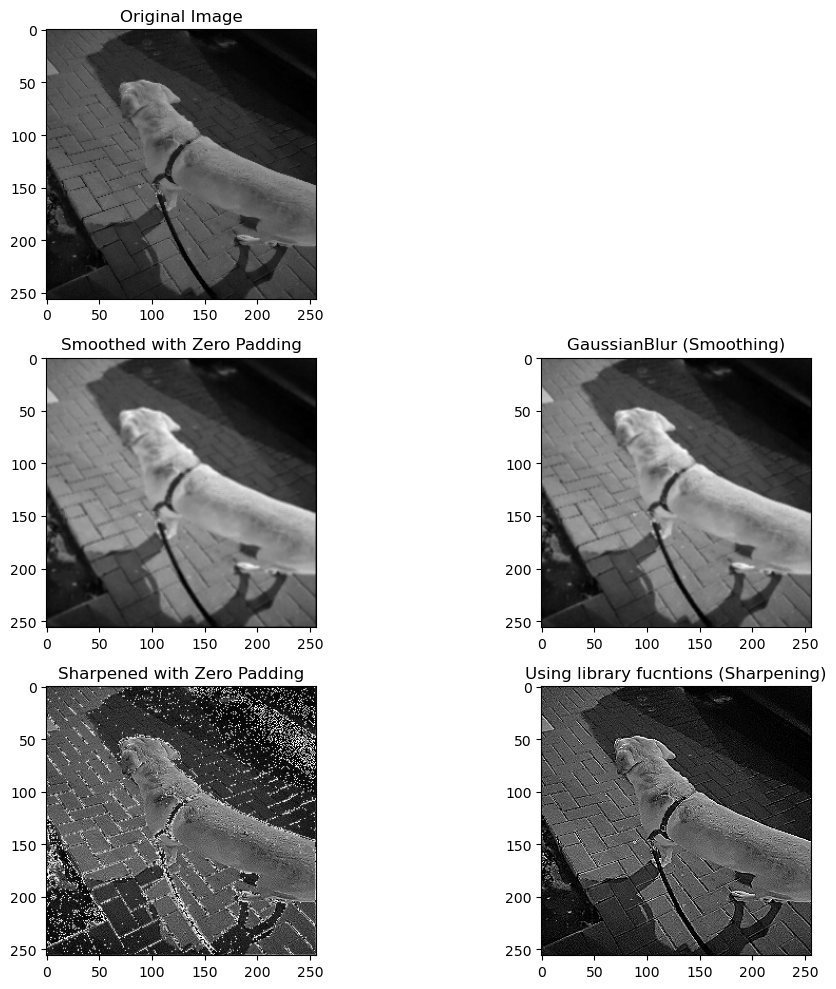

In [34]:
# Displaying the original image processed results with my padding compared with the library function
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 3, 4)
plt.imshow(result_smoothing, cmap='gray')
plt.title('Smoothed with Zero Padding')

plt.subplot(3, 3, 5)
plt.imshow(result_gaussian, cmap='gray')
plt.title('GaussianBlur (Smoothing)')

plt.subplot(3, 3, 7)
plt.imshow(result_sharpening, cmap='gray')
plt.title('Sharpened with Zero Padding')

plt.subplot(3, 3, 8)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Using library fucntions (Sharpening)')

plt.tight_layout()
plt.show()

## Part 2:  Creating new function, my_compose.

Write a function r=my_compose(s,s1,m2) that receives 2 images and creates "combined" image where the m high bits (msb) of the result are from the first image, and the lower 8-m are the high bits (msb) of the second image.

• Also, write a function that checks whether the image is "fake". Explain what you did (what is the algorithem).

• If m is not given, the default is 3

• Work on photos you took (move them to gray level 256X256)



In [14]:
def my_compose(s1, s2, m=3):
    # Resize both images to 256x256
    s1 = cv.cvtColor(cv.resize(s1, (256, 256)), cv.COLOR_BGR2GRAY)
    s2 = cv.cvtColor(cv.resize(s2, (256, 256)), cv.COLOR_BGR2GRAY)

    # If m is outside of the valid values change it to 3
    if m < 0 or m > 8:
        m=3

    # Combine the images based on the amount of m given
    combined_image = (s1 >> (8 - m)) << (8 - m)  # Seperating the m high bits from s1
    combined_image += ((s2 << m) >> m)  # Seperating the (8-m) low bits from s2 and combining them with the high bits from s1

   

    return combined_image.astype(np.uint8)

Fake image fucntion detection, compares the combined image with the original (image1)

In [15]:
def is_faked_image(combined_image, original_image):
    # Performing bitwise AND operation for each pixel to take its LSB 1 and MSB 1 
    # both from the combined image and original image 
    
    # Extracting the LSB 1 from the combined image
    lsb_combined = combined_image & 0b01

    # Extracting the LSB 1 from original
    lsb_original = original_image & 0b01
    
    # Extracting the MSB 1 from the combined image
    msb_combined = combined_image & 0b10000000

    # Extracting the MSB 1 from original
    msb_original = original_image & 0b10000000
    
    # Checking if all LSB 1 bits dont match and MSB 1 match
    
    return (not np.all(lsb_combined == lsb_original)) and np.all(msb_combined == msb_original)
    
    

#### The Algorither explanation: 
The idea behind the algorithm is to check the highest bit (MSB) between the "fake" image and the original image and exactly the same for the lowest bit (LSB).
Because in the extreme case if the m is 8 then the MBS is always equal between the fake image and the original and the LSB is also equal, so the image is not really fake because it was not really changed.
In the case of m equal to 0, then a situation is created where we replaced the original image (image 1) with the second image and did not really fake any image.

In the other cases, there will always be at least one bit of the low bits of image 2 that we will combine with image 1 and create a new image, so it will be sufficient for us to check and see if the lowest bit is different from the original image (image 1) and the combined (fake) image.
And the test of the highest bit is equal in both because also to be sure that it is the same image on which we added the low bits.

The chance that two different images taken will have the same 1 MSB and 1 LSB is very low so this test will almost always work unless these are images engineered to have the same 1 MBS and 1 LSB.

### Demonstration of the functions

In [16]:
# Grabbing 2 images
image1 = cv.imread('my_dog.jpg')
image2 = cv.imread('my_dog2.jpg')
image1_GRAY = cv.cvtColor(cv.resize(image1, (256, 256)), cv.COLOR_BGR2GRAY)
image2_GRAY = cv.cvtColor(cv.resize(image2, (256, 256)), cv.COLOR_BGR2GRAY)

# Combinining the images
combined_image = my_compose(image1, image2, m=3)

Text(0.5, 1.0, 'Combined Image')

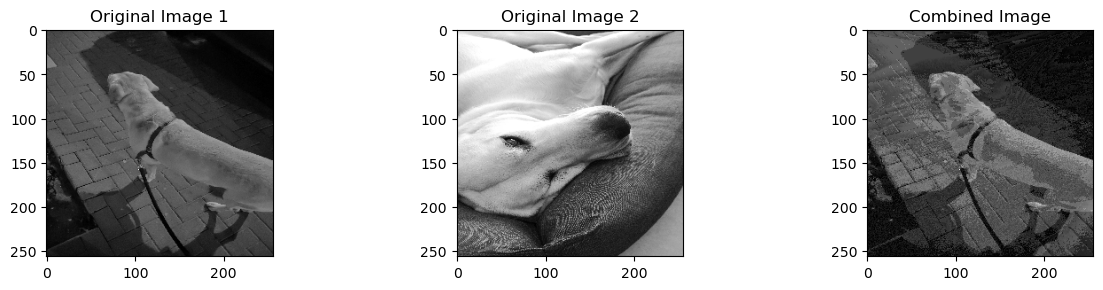

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(image1_GRAY, cmap='gray')
plt.title('Original Image 1')
plt.subplot(3, 3, 2)
plt.imshow(image2_GRAY, cmap='gray')
plt.title('Original Image 2')
plt.subplot(3, 3, 3)
plt.imshow(combined_image, cmap='gray')
plt.title('Combined Image')

Comparing the combined with the original(in gray scale)

In [18]:
is_faked_image(combined_image,image1_GRAY)

True